In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
dt = pd.read_excel('LUAD_flux.xlsx',index_col=0)


In [4]:
dt.shape

(517, 1962)

In [5]:
dt.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Overall Survival (Months)
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,14.770344,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,34.017476,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,50.03


In [6]:
X = dt.iloc[:,0:1961].values
y = dt.iloc[:, -1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [9]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [10]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [11]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [12]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 696us/sample - loss: 1.1620 - mean_absolute_error: 0.7416
Epoch 2/10
297/297 [==============================] - 0s 206us/sample - loss: 1.0393 - mean_absolute_error: 0.6638
Epoch 3/10
297/297 [==============================] - 0s 174us/sample - loss: 0.9919 - mean_absolute_error: 0.6483
Epoch 4/10
297/297 [==============================] - 0s 175us/sample - loss: 0.9075 - mean_absolute_error: 0.6068
Epoch 5/10
297/297 [==============================] - 0s 181us/sample - loss: 0.8234 - mean_absolute_error: 0.6163
Epoch 6/10
297/297 [==============================] - 0s 181us/sample - loss: 0.9032 - mean_absolute_error: 0.6051
Epoch 7/10
297/297 [==============================] - 0s 172us/sample - loss: 0.8455 - mean_absolute_error: 0.5748
Epoch 8/10
297/297 [==============================] - 0s 181us/sample - loss: 0.8096 - mean_absolute_error: 0.6001
Epoch 9/10
297/297 [==============================] - 0s 181us/sample - loss: 0.

Epoch 7/10
297/297 [==============================] - 0s 171us/sample - loss: 0.6807 - mean_absolute_error: 0.5612
Epoch 8/10
297/297 [==============================] - 0s 169us/sample - loss: 0.6575 - mean_absolute_error: 0.5256
Epoch 9/10
297/297 [==============================] - 0s 169us/sample - loss: 0.7685 - mean_absolute_error: 0.5370
Epoch 10/10
33/33 [==============================] - 0s 1ms/sample - loss: 1.4625 - mean_absolute_error: 0.6407
Epoch 1/10
297/297 [==============================] - 0s 579us/sample - loss: 1.1557 - mean_absolute_error: 0.7156
Epoch 2/10
297/297 [==============================] - 0s 173us/sample - loss: 1.0645 - mean_absolute_error: 0.6910
Epoch 3/10
297/297 [==============================] - 0s 172us/sample - loss: 1.0043 - mean_absolute_error: 0.6621
Epoch 4/10
297/297 [==============================] - 0s 168us/sample - loss: 0.8971 - mean_absolute_error: 0.6276
Epoch 5/10
297/297 [==============================] - 0s 168us/sample - loss: 0.965

In [13]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 562us/sample - loss: 1.0898 - mean_absolute_error: 0.6971
Epoch 2/10
330/330 [==============================] - 0s 188us/sample - loss: 0.9532 - mean_absolute_error: 0.6578
Epoch 3/10
330/330 [==============================] - 0s 182us/sample - loss: 0.9041 - mean_absolute_error: 0.6377
Epoch 4/10
330/330 [==============================] - 0s 172us/sample - loss: 0.8898 - mean_absolute_error: 0.6240
Epoch 5/10
330/330 [==============================] - 0s 184us/sample - loss: 0.8686 - mean_absolute_error: 0.6203
Epoch 6/10
330/330 [==============================] - 0s 185us/sample - loss: 0.7208 - mean_absolute_error: 0.5736
Epoch 7/10
330/330 [==============================] - 0s 174us/sample - loss: 0.7228 - mean_absolute_error: 0.5686
Epoch 8/10
330/330 [==============================] - 0s 184us/sample - loss: 0.6304 - mean_absolute_error: 0.5282
Epoch 9/10
330/330 [==============================] - 0s 192us/sample - loss: 0.

In [14]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 208us/sample


In [15]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.7233769902182119
0.9991249023496774
0.9995623554084445
R2 Score
-0.4014310920834756


R^2 = -0.4014


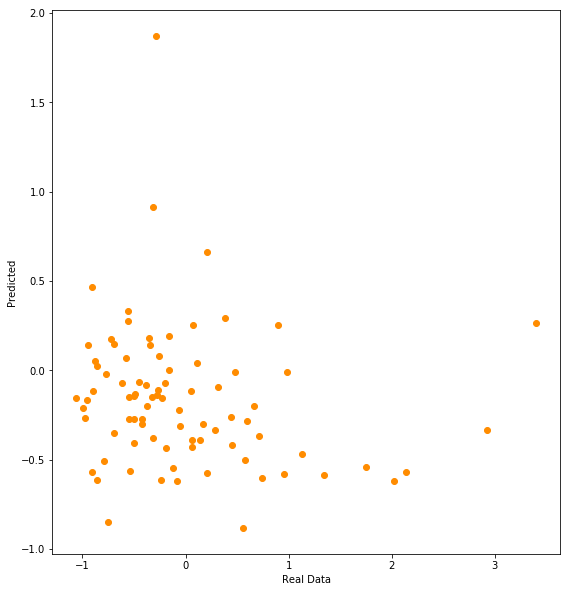

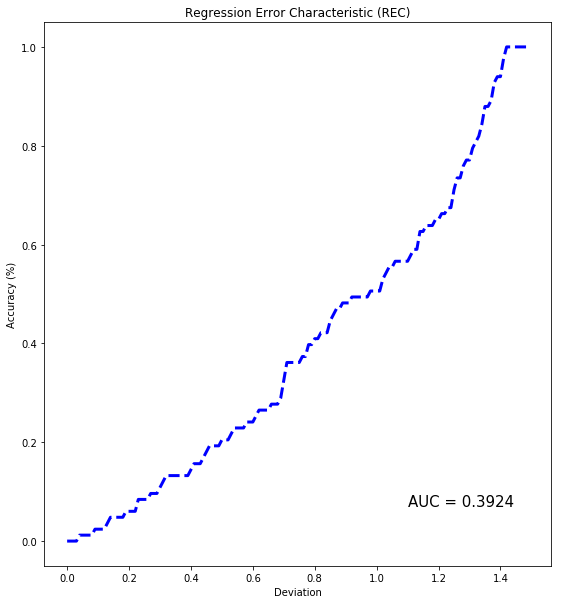

In [17]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [18]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20]
epochs = [10, 20,30,40]

In [19]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.1152 - mean_absolute_error: 0.7160
Epoch 2/10
220/220 [==============================] - 0s 529us/sample - loss: 1.0720 - mean_absolute_error: 0.6627
Epoch 3/10
220/220 [==============================] - 0s 543us/sample - loss: 0.9959 - mean_absolute_error: 0.6271
Epoch 4/10
220/220 [==============================] - 0s 543us/sample - loss: 0.9885 - mean_absolute_error: 0.6274
Epoch 5/10
220/220 [==============================] - 0s 556us/sample - loss: 0.9698 - mean_absolute_error: 0.6107
Epoch 6/10
220/220 [==============================] - 0s 546us/sample - loss: 0.8713 - mean_absolute_error: 0.5837
Epoch 7/10
220/220 [==============================] - 0s 547us/sample - loss: 0.7846 - mean_absolute_error: 0.5593
Epoch 8/10
220/220 [==============================] - 0s 538us/sample - loss: 0.9361 - mean_absolute_error: 0.5865
Epoch 9/10
220/220 [==============================] - 0s 542us/sample - loss: 0.88

Epoch 15/20
220/220 [==============================] - 0s 461us/sample - loss: 0.3571 - mean_absolute_error: 0.3747
Epoch 16/20
220/220 [==============================] - 0s 452us/sample - loss: 0.2958 - mean_absolute_error: 0.3658
Epoch 17/20
220/220 [==============================] - 0s 456us/sample - loss: 0.3045 - mean_absolute_error: 0.3595
Epoch 18/20
220/220 [==============================] - 0s 464us/sample - loss: 0.2555 - mean_absolute_error: 0.3239
Epoch 19/20
220/220 [==============================] - 0s 462us/sample - loss: 0.2702 - mean_absolute_error: 0.3424
Epoch 20/20
220/220 [==============================] - 0s 144us/sample - loss: 0.1653 - mean_absolute_error: 0.2612
Epoch 1/20
220/220 [==============================] - 0s 989us/sample - loss: 1.4229 - mean_absolute_error: 0.7854
Epoch 2/20
220/220 [==============================] - 0s 452us/sample - loss: 1.2478 - mean_absolute_error: 0.7545
Epoch 3/20
220/220 [==============================] - 0s 454us/sample - lo

220/220 [==============================] - 0s 466us/sample - loss: 0.5143 - mean_absolute_error: 0.4794
Epoch 11/30
220/220 [==============================] - 0s 460us/sample - loss: 0.4349 - mean_absolute_error: 0.4255
Epoch 12/30
220/220 [==============================] - 0s 468us/sample - loss: 0.3722 - mean_absolute_error: 0.4149
Epoch 13/30
220/220 [==============================] - 0s 460us/sample - loss: 0.4822 - mean_absolute_error: 0.4300
Epoch 14/30
220/220 [==============================] - 0s 459us/sample - loss: 0.3547 - mean_absolute_error: 0.3880
Epoch 15/30
220/220 [==============================] - 0s 460us/sample - loss: 0.3100 - mean_absolute_error: 0.3728
Epoch 16/30
220/220 [==============================] - 0s 459us/sample - loss: 0.3736 - mean_absolute_error: 0.4060
Epoch 17/30
220/220 [==============================] - 0s 465us/sample - loss: 0.3087 - mean_absolute_error: 0.3678
Epoch 18/30
220/220 [==============================] - 0s 465us/sample - loss: 0.331

220/220 [==============================] - 0s 449us/sample - loss: 0.6112 - mean_absolute_error: 0.4664
Epoch 18/40
220/220 [==============================] - 0s 448us/sample - loss: 0.5223 - mean_absolute_error: 0.4426
Epoch 19/40
220/220 [==============================] - 0s 450us/sample - loss: 0.5174 - mean_absolute_error: 0.4217
Epoch 20/40
220/220 [==============================] - 0s 459us/sample - loss: 0.4829 - mean_absolute_error: 0.3875
Epoch 21/40
220/220 [==============================] - 0s 452us/sample - loss: 0.4586 - mean_absolute_error: 0.3989
Epoch 22/40
220/220 [==============================] - 0s 493us/sample - loss: 0.3783 - mean_absolute_error: 0.3527
Epoch 23/40
220/220 [==============================] - 0s 490us/sample - loss: 0.5055 - mean_absolute_error: 0.4094
Epoch 24/40
220/220 [==============================] - 0s 487us/sample - loss: 0.3641 - mean_absolute_error: 0.3797
Epoch 25/40
220/220 [==============================] - 0s 500us/sample - loss: 0.390

220/220 [==============================] - 0s 556us/sample - loss: 1.1724 - mean_absolute_error: 0.7040
Epoch 5/40
220/220 [==============================] - 0s 519us/sample - loss: 1.1628 - mean_absolute_error: 0.7224
Epoch 6/40
220/220 [==============================] - 0s 514us/sample - loss: 1.0629 - mean_absolute_error: 0.6817
Epoch 7/40
220/220 [==============================] - 0s 520us/sample - loss: 1.1302 - mean_absolute_error: 0.7041
Epoch 8/40
220/220 [==============================] - 0s 515us/sample - loss: 0.9658 - mean_absolute_error: 0.6379
Epoch 9/40
220/220 [==============================] - 0s 525us/sample - loss: 1.0926 - mean_absolute_error: 0.6552
Epoch 10/40
220/220 [==============================] - 0s 521us/sample - loss: 0.9059 - mean_absolute_error: 0.6063
Epoch 11/40
220/220 [==============================] - 0s 527us/sample - loss: 0.9241 - mean_absolute_error: 0.6177
Epoch 12/40
220/220 [==============================] - 0s 523us/sample - loss: 0.6750 - m

220/220 [==============================] - 0s 258us/sample - loss: 0.7106 - mean_absolute_error: 0.5595
Epoch 10/10
220/220 [==============================] - 0s 92us/sample - loss: 0.4601 - mean_absolute_error: 0.4412
Epoch 1/20
220/220 [==============================] - 0s 780us/sample - loss: 1.0884 - mean_absolute_error: 0.6876
Epoch 2/20
220/220 [==============================] - 0s 250us/sample - loss: 1.0613 - mean_absolute_error: 0.6400
Epoch 3/20
220/220 [==============================] - 0s 241us/sample - loss: 0.9194 - mean_absolute_error: 0.6263
Epoch 4/20
220/220 [==============================] - 0s 247us/sample - loss: 0.8309 - mean_absolute_error: 0.5762
Epoch 5/20
220/220 [==============================] - 0s 246us/sample - loss: 0.9423 - mean_absolute_error: 0.6018
Epoch 6/20
220/220 [==============================] - 0s 243us/sample - loss: 0.8315 - mean_absolute_error: 0.5720
Epoch 7/20
220/220 [==============================] - 0s 267us/sample - loss: 0.8104 - mean

220/220 [==============================] - 0s 246us/sample - loss: 0.9943 - mean_absolute_error: 0.6364
Epoch 3/30
220/220 [==============================] - 0s 239us/sample - loss: 0.8821 - mean_absolute_error: 0.6274
Epoch 4/30
220/220 [==============================] - 0s 249us/sample - loss: 0.8582 - mean_absolute_error: 0.5968
Epoch 5/30
220/220 [==============================] - 0s 245us/sample - loss: 0.7526 - mean_absolute_error: 0.5582
Epoch 6/30
220/220 [==============================] - 0s 260us/sample - loss: 0.7944 - mean_absolute_error: 0.5504
Epoch 7/30
220/220 [==============================] - 0s 247us/sample - loss: 0.5517 - mean_absolute_error: 0.4733
Epoch 8/30
220/220 [==============================] - 0s 261us/sample - loss: 0.5710 - mean_absolute_error: 0.5144
Epoch 9/30
220/220 [==============================] - 0s 248us/sample - loss: 0.6225 - mean_absolute_error: 0.4877
Epoch 10/30
220/220 [==============================] - 0s 247us/sample - loss: 0.5317 - mea

220/220 [==============================] - 0s 263us/sample - loss: 0.9114 - mean_absolute_error: 0.5752
Epoch 10/30
220/220 [==============================] - 0s 267us/sample - loss: 0.7603 - mean_absolute_error: 0.5930
Epoch 11/30
220/220 [==============================] - 0s 258us/sample - loss: 0.9215 - mean_absolute_error: 0.6120
Epoch 12/30
220/220 [==============================] - 0s 247us/sample - loss: 0.6153 - mean_absolute_error: 0.5300
Epoch 13/30
220/220 [==============================] - 0s 250us/sample - loss: 0.4857 - mean_absolute_error: 0.4957
Epoch 14/30
220/220 [==============================] - 0s 252us/sample - loss: 0.4787 - mean_absolute_error: 0.4970
Epoch 15/30
220/220 [==============================] - 0s 260us/sample - loss: 0.3965 - mean_absolute_error: 0.4273
Epoch 16/30
220/220 [==============================] - 0s 256us/sample - loss: 0.5678 - mean_absolute_error: 0.5054
Epoch 17/30
220/220 [==============================] - 0s 250us/sample - loss: 0.436

220/220 [==============================] - 0s 257us/sample - loss: 0.4709 - mean_absolute_error: 0.4627
Epoch 7/40
220/220 [==============================] - 0s 246us/sample - loss: 0.4454 - mean_absolute_error: 0.4541
Epoch 8/40
220/220 [==============================] - 0s 242us/sample - loss: 0.4171 - mean_absolute_error: 0.4336
Epoch 9/40
220/220 [==============================] - 0s 249us/sample - loss: 0.4361 - mean_absolute_error: 0.4491
Epoch 10/40
220/220 [==============================] - 0s 243us/sample - loss: 0.3330 - mean_absolute_error: 0.3977
Epoch 11/40
220/220 [==============================] - 0s 251us/sample - loss: 0.3532 - mean_absolute_error: 0.4136
Epoch 12/40
220/220 [==============================] - 0s 244us/sample - loss: 0.2881 - mean_absolute_error: 0.3808
Epoch 13/40
220/220 [==============================] - 0s 247us/sample - loss: 0.2841 - mean_absolute_error: 0.3577
Epoch 14/40
220/220 [==============================] - 0s 260us/sample - loss: 0.2344 -

220/220 [==============================] - 0s 264us/sample - loss: 0.0313 - mean_absolute_error: 0.1226
Epoch 36/40
220/220 [==============================] - 0s 267us/sample - loss: 0.0241 - mean_absolute_error: 0.1065
Epoch 37/40
220/220 [==============================] - 0s 260us/sample - loss: 0.0240 - mean_absolute_error: 0.1102
Epoch 38/40
220/220 [==============================] - 0s 251us/sample - loss: 0.0197 - mean_absolute_error: 0.0941
Epoch 39/40
220/220 [==============================] - 0s 259us/sample - loss: 0.0143 - mean_absolute_error: 0.0832
Epoch 40/40
220/220 [==============================] - 0s 90us/sample - loss: 0.0111 - mean_absolute_error: 0.0702
Epoch 1/10
220/220 [==============================] - 0s 721us/sample - loss: 1.1160 - mean_absolute_error: 0.6930
Epoch 2/10
220/220 [==============================] - 0s 215us/sample - loss: 1.0182 - mean_absolute_error: 0.6533
Epoch 3/10
220/220 [==============================] - 0s 208us/sample - loss: 0.9186 - 

220/220 [==============================] - 0s 194us/sample - loss: 0.4203 - mean_absolute_error: 0.4276
Epoch 8/20
220/220 [==============================] - 0s 201us/sample - loss: 0.3541 - mean_absolute_error: 0.3982
Epoch 9/20
220/220 [==============================] - 0s 219us/sample - loss: 0.3091 - mean_absolute_error: 0.3926
Epoch 10/20
220/220 [==============================] - 0s 211us/sample - loss: 0.2668 - mean_absolute_error: 0.3512
Epoch 11/20
220/220 [==============================] - 0s 206us/sample - loss: 0.3496 - mean_absolute_error: 0.3660
Epoch 12/20
220/220 [==============================] - 0s 208us/sample - loss: 0.2866 - mean_absolute_error: 0.3836
Epoch 13/20
220/220 [==============================] - 0s 208us/sample - loss: 0.3360 - mean_absolute_error: 0.3667
Epoch 14/20
220/220 [==============================] - 0s 201us/sample - loss: 0.2692 - mean_absolute_error: 0.3242
Epoch 15/20
220/220 [==============================] - 0s 201us/sample - loss: 0.2259 

220/220 [==============================] - 0s 220us/sample - loss: 0.6893 - mean_absolute_error: 0.5874
Epoch 3/30
220/220 [==============================] - 0s 198us/sample - loss: 0.5574 - mean_absolute_error: 0.5137
Epoch 4/30
220/220 [==============================] - 0s 188us/sample - loss: 0.5268 - mean_absolute_error: 0.5029
Epoch 5/30
220/220 [==============================] - 0s 193us/sample - loss: 0.4959 - mean_absolute_error: 0.4709
Epoch 6/30
220/220 [==============================] - 0s 187us/sample - loss: 0.4798 - mean_absolute_error: 0.4756
Epoch 7/30
220/220 [==============================] - 0s 192us/sample - loss: 0.5281 - mean_absolute_error: 0.4906
Epoch 8/30
220/220 [==============================] - 0s 190us/sample - loss: 0.4107 - mean_absolute_error: 0.4338
Epoch 9/30
220/220 [==============================] - 0s 193us/sample - loss: 0.3591 - mean_absolute_error: 0.4143
Epoch 10/30
220/220 [==============================] - 0s 188us/sample - loss: 0.4269 - mea

220/220 [==============================] - 0s 230us/sample - loss: 0.6701 - mean_absolute_error: 0.5135
Epoch 10/40
220/220 [==============================] - 0s 261us/sample - loss: 0.4346 - mean_absolute_error: 0.4330
Epoch 11/40
220/220 [==============================] - 0s 199us/sample - loss: 0.3955 - mean_absolute_error: 0.4168
Epoch 12/40
220/220 [==============================] - 0s 203us/sample - loss: 0.3757 - mean_absolute_error: 0.4093
Epoch 13/40
220/220 [==============================] - 0s 212us/sample - loss: 0.4579 - mean_absolute_error: 0.4171
Epoch 14/40
220/220 [==============================] - 0s 210us/sample - loss: 0.2449 - mean_absolute_error: 0.3610
Epoch 15/40
220/220 [==============================] - 0s 210us/sample - loss: 0.2474 - mean_absolute_error: 0.3515
Epoch 16/40
220/220 [==============================] - 0s 209us/sample - loss: 0.2509 - mean_absolute_error: 0.3401
Epoch 17/40
220/220 [==============================] - 0s 207us/sample - loss: 0.241

220/220 [==============================] - 0s 206us/sample - loss: 0.1206 - mean_absolute_error: 0.1871
Epoch 39/40
220/220 [==============================] - 0s 215us/sample - loss: 0.0715 - mean_absolute_error: 0.1686
Epoch 40/40
220/220 [==============================] - 0s 75us/sample - loss: 0.0843 - mean_absolute_error: 0.1677
Epoch 1/40
220/220 [==============================] - 0s 732us/sample - loss: 1.3271 - mean_absolute_error: 0.7935
Epoch 2/40
220/220 [==============================] - 0s 190us/sample - loss: 1.2802 - mean_absolute_error: 0.7610
Epoch 3/40
220/220 [==============================] - 0s 188us/sample - loss: 1.1275 - mean_absolute_error: 0.7541
Epoch 4/40
220/220 [==============================] - 0s 188us/sample - loss: 0.9876 - mean_absolute_error: 0.6587
Epoch 5/40
220/220 [==============================] - 0s 188us/sample - loss: 0.9135 - mean_absolute_error: 0.6288
Epoch 6/40
220/220 [==============================] - 0s 188us/sample - loss: 0.8807 - mea

220/220 [==============================] - 0s 734us/sample - loss: 1.3468 - mean_absolute_error: 0.7795
Epoch 2/10
220/220 [==============================] - 0s 167us/sample - loss: 1.2440 - mean_absolute_error: 0.7592
Epoch 3/10
220/220 [==============================] - 0s 160us/sample - loss: 1.1255 - mean_absolute_error: 0.7216
Epoch 4/10
220/220 [==============================] - 0s 151us/sample - loss: 1.1098 - mean_absolute_error: 0.7161
Epoch 5/10
220/220 [==============================] - 0s 151us/sample - loss: 0.9863 - mean_absolute_error: 0.6478
Epoch 6/10
220/220 [==============================] - 0s 152us/sample - loss: 0.9137 - mean_absolute_error: 0.6557
Epoch 7/10
220/220 [==============================] - 0s 152us/sample - loss: 0.8463 - mean_absolute_error: 0.6528
Epoch 8/10
220/220 [==============================] - 0s 150us/sample - loss: 0.6770 - mean_absolute_error: 0.5648
Epoch 9/10
220/220 [==============================] - 0s 152us/sample - loss: 0.5445 - mean

220/220 [==============================] - 0s 150us/sample - loss: 0.3370 - mean_absolute_error: 0.3620
Epoch 17/20
220/220 [==============================] - 0s 153us/sample - loss: 0.2820 - mean_absolute_error: 0.3431
Epoch 18/20
220/220 [==============================] - 0s 144us/sample - loss: 0.2457 - mean_absolute_error: 0.3144
Epoch 19/20
220/220 [==============================] - 0s 147us/sample - loss: 0.1534 - mean_absolute_error: 0.2910
Epoch 20/20
220/220 [==============================] - 0s 66us/sample - loss: 0.0908 - mean_absolute_error: 0.2183
Epoch 1/30
220/220 [==============================] - 0s 698us/sample - loss: 1.0978 - mean_absolute_error: 0.6607
Epoch 2/30
220/220 [==============================] - 0s 165us/sample - loss: 0.9528 - mean_absolute_error: 0.6245
Epoch 3/30
220/220 [==============================] - 0s 168us/sample - loss: 0.8345 - mean_absolute_error: 0.5731
Epoch 4/30
220/220 [==============================] - 0s 170us/sample - loss: 0.8113 - m

220/220 [==============================] - 0s 691us/sample - loss: 1.3356 - mean_absolute_error: 0.7814
Epoch 2/30
220/220 [==============================] - 0s 148us/sample - loss: 1.2095 - mean_absolute_error: 0.7260
Epoch 3/30
220/220 [==============================] - 0s 150us/sample - loss: 1.1339 - mean_absolute_error: 0.7371
Epoch 4/30
220/220 [==============================] - 0s 147us/sample - loss: 1.0251 - mean_absolute_error: 0.6972
Epoch 5/30
220/220 [==============================] - 0s 141us/sample - loss: 0.9056 - mean_absolute_error: 0.6454
Epoch 6/30
220/220 [==============================] - 0s 150us/sample - loss: 0.7832 - mean_absolute_error: 0.5918
Epoch 7/30
220/220 [==============================] - 0s 151us/sample - loss: 0.6844 - mean_absolute_error: 0.5698
Epoch 8/30
220/220 [==============================] - 0s 148us/sample - loss: 0.6107 - mean_absolute_error: 0.4950
Epoch 9/30
220/220 [==============================] - 0s 149us/sample - loss: 0.6154 - mean

220/220 [==============================] - 0s 62us/sample - loss: 0.0315 - mean_absolute_error: 0.1116
Epoch 1/40
220/220 [==============================] - 0s 697us/sample - loss: 0.7841 - mean_absolute_error: 0.6190
Epoch 2/40
220/220 [==============================] - 0s 150us/sample - loss: 0.6761 - mean_absolute_error: 0.5815
Epoch 3/40
220/220 [==============================] - 0s 152us/sample - loss: 0.5832 - mean_absolute_error: 0.5257
Epoch 4/40
220/220 [==============================] - 0s 152us/sample - loss: 0.5162 - mean_absolute_error: 0.5076
Epoch 5/40
220/220 [==============================] - 0s 150us/sample - loss: 0.4567 - mean_absolute_error: 0.4622
Epoch 6/40
220/220 [==============================] - 0s 145us/sample - loss: 0.4235 - mean_absolute_error: 0.4384
Epoch 7/40
220/220 [==============================] - 0s 147us/sample - loss: 0.3461 - mean_absolute_error: 0.3899
Epoch 8/40
220/220 [==============================] - 0s 149us/sample - loss: 0.3226 - mean_

220/220 [==============================] - 0s 143us/sample - loss: 0.0387 - mean_absolute_error: 0.1288
Epoch 28/40
220/220 [==============================] - 0s 145us/sample - loss: 0.0285 - mean_absolute_error: 0.1155
Epoch 29/40
220/220 [==============================] - 0s 146us/sample - loss: 0.0212 - mean_absolute_error: 0.0965
Epoch 30/40
220/220 [==============================] - 0s 148us/sample - loss: 0.0214 - mean_absolute_error: 0.0931
Epoch 31/40
220/220 [==============================] - 0s 151us/sample - loss: 0.0225 - mean_absolute_error: 0.0918
Epoch 32/40
220/220 [==============================] - 0s 150us/sample - loss: 0.0202 - mean_absolute_error: 0.0973
Epoch 33/40
220/220 [==============================] - 0s 151us/sample - loss: 0.0256 - mean_absolute_error: 0.0933
Epoch 34/40
220/220 [==============================] - 0s 152us/sample - loss: 0.0191 - mean_absolute_error: 0.0887
Epoch 35/40
220/220 [==============================] - 0s 149us/sample - loss: 0.012

In [20]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.096049 using {'batch_size': 5, 'epochs': 10}
-1.096049 (0.444407) with: {'batch_size': 5, 'epochs': 10}
-1.495295 (0.429459) with: {'batch_size': 5, 'epochs': 20}
-1.653285 (0.186809) with: {'batch_size': 5, 'epochs': 30}
-1.524650 (0.468880) with: {'batch_size': 5, 'epochs': 40}
-1.580636 (0.413951) with: {'batch_size': 10, 'epochs': 10}
-1.342445 (0.366520) with: {'batch_size': 10, 'epochs': 20}
-1.537921 (0.424536) with: {'batch_size': 10, 'epochs': 30}
-1.524046 (0.369758) with: {'batch_size': 10, 'epochs': 40}
-1.272130 (0.423852) with: {'batch_size': 15, 'epochs': 10}
-1.357260 (0.396820) with: {'batch_size': 15, 'epochs': 20}
-1.512429 (0.420741) with: {'batch_size': 15, 'epochs': 30}
-1.432215 (0.268883) with: {'batch_size': 15, 'epochs': 40}
-1.456508 (0.304150) with: {'batch_size': 20, 'epochs': 10}
-1.440130 (0.300241) with: {'batch_size': 20, 'epochs': 20}
-1.489799 (0.278471) with: {'batch_size': 20, 'epochs': 30}
-1.496539 (0.258596) with: {'batch_size': 20, 'epo

In [21]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=5, epochs=10, verbose=True)

In [22]:
newmodel.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 869us/sample - loss: 1.1141 - mean_absolute_error: 0.7117
Epoch 2/10
330/330 [==============================] - 0s 499us/sample - loss: 1.0311 - mean_absolute_error: 0.6728
Epoch 3/10
330/330 [==============================] - 0s 509us/sample - loss: 1.0062 - mean_absolute_error: 0.6800
Epoch 4/10
330/330 [==============================] - 0s 540us/sample - loss: 0.9645 - mean_absolute_error: 0.6444
Epoch 5/10
330/330 [==============================] - 0s 498us/sample - loss: 0.9207 - mean_absolute_error: 0.6253
Epoch 6/10
330/330 [==============================] - 0s 493us/sample - loss: 0.9124 - mean_absolute_error: 0.6358
Epoch 7/10
330/330 [==============================] - 0s 496us/sample - loss: 0.8911 - mean_absolute_error: 0.6098
Epoch 8/10
330/330 [==============================] - 0s 494us/sample - loss: 0.8401 - mean_absolute_error: 0.5807
Epoch 9/10
330/330 [==============================] - 0s 506us/sample - loss: 0.

In [23]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 265us/sample


In [24]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6733546602932224
0.8735972596350535
0.934664249682769
R2 Score
-0.2253586701044954


R^2 = -0.2254


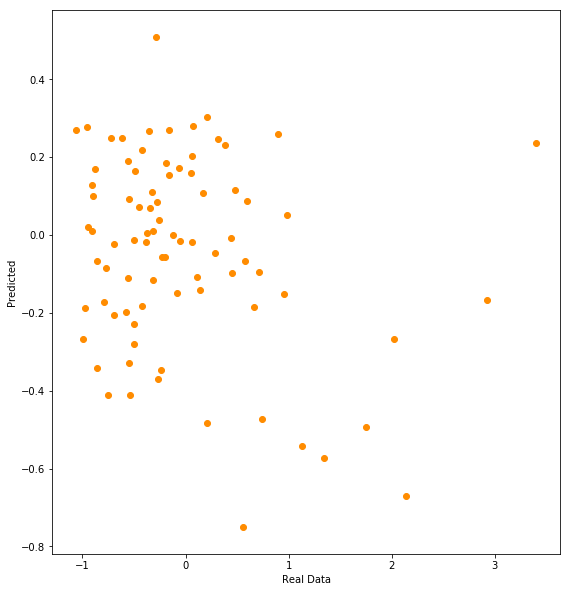

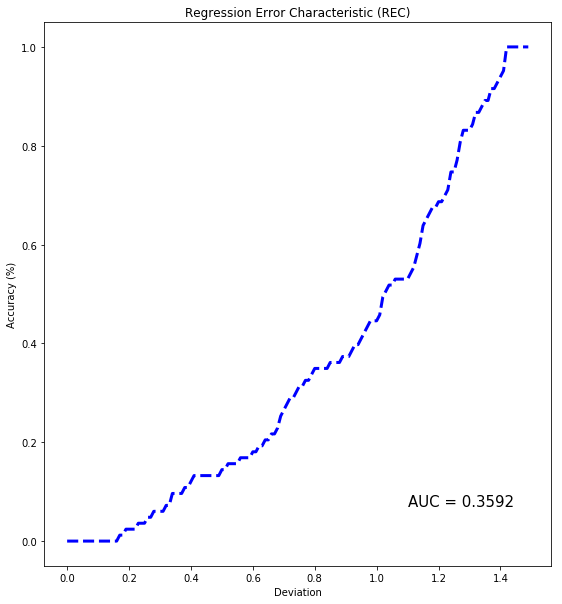

In [25]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()